In [3]:
import h5py
import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
torch.manual_seed(0) # Set for testing purposes, please do not change!
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
%matplotlib inline 
import seaborn as sns
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

image_size=256
batch_size=1


# Function to calculate the characteristic of the protein's structure distance matrix.
 ### BackBone on natural protein 3.78A
 ### Short  on natural protein 7.5A
  ### Long  on natural protein 25.01A


In [4]:

def ckeckBackBone(fake_images,image_size=image_size,batch_size=13):#4
    #BackBone
    sum=0
    avgBatch=0
    batch=batch_size
    for b in range(batch):
        for i in range(image_size):
            for j in range(i+1,image_size):
                sum+=fake_images[b][0][i][j]
                break
        avgPeptiedBond=(sum/image_size)
        sum=0
        #print("avg peptide bond protien",b," : " ,avgPeptiedBond)
        avgBatch+=avgPeptiedBond
    return(avgBatch/batch)
    #print("avg peptide bond BackBone protien for batch" ,(avgBatch/batch))



def ckeckshort(fake_images,image_size=image_size,batch_size=13):#10
    #short
    avgBatch=0
    batch=batch_size
    imgSize_4=(image_size-4)
    for b in range(batch):
        sum=0
        for i in range(image_size):
            for j in range(i,imgSize_4,4):
                sum+=(fake_images[b][0][i][j+2]+fake_images[b][0][i][j+3]+fake_images[b][0][i][j+4])/3
                break
        avgPeptiedBond=(sum/imgSize_4)
        #print("avg peptide bond protien",b," : " ,avgPeptiedBond)
        avgBatch+=avgPeptiedBond
    return(avgBatch/batch)
    #print("avg peptide bond short protien for batch" ,(avgBatch/batch))
    


def ckeckLong(fake_images,image_size=image_size,batch_size=13):#20
    #Long
    batch=batch_size
    bsum=0
    c=0
    for b in range(batch):
        msum=0
        for i in range(image_size-5):
            sum=0
            for j in range(i+5,(image_size)):
                sum+=fake_images[b][0][i][j]
            sum/=(j+1-(i+5))
            msum+=sum
        bsum+=(msum/image_size)
    #print("avg peptide bond Long protien for batch" ,(bsum/batch))
    return (bsum/batch)

def show_image(fake_images,index=0,image_size=image_size):
    import seaborn as sns
    sns.heatmap((fake_images[index].view(image_size,image_size).detach().numpy()))


# Generator network architecture


In [6]:
#MR



def conv_block(in_channels, out_channels, pool=False):
        layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
        nn.BatchNorm2d(out_channels), 
        nn.LeakyReLU(0.2, inplace=True)]
        if pool: layers.append(nn.MaxPool2d(2))
        return nn.Sequential(*layers)
    
class Generator256(nn.Module):
	def __init__(self, ngpu):
		super(Generator256, self).__init__()
		#self.ngpu = ngpu        #1
		self.conv1 =nn.Sequential(nn.ConvTranspose2d(100, 512, kernel_size=4, stride=4, padding=0, bias=False),
                        nn.BatchNorm2d(512),#4
                        nn.LeakyReLU(0.2, inplace=True))
		self.conv2 = nn.Sequential(nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
                                    nn.BatchNorm2d(256),#8
                                    nn.LeakyReLU(0.2, inplace=True))    
		self.res1 = nn.Sequential(conv_block(256, 256), conv_block(256, 256))
		self.conv3 =nn.Sequential(nn.ConvTranspose2d(256, 128, kernel_size=4, stride=4, padding=0, bias=False),
                                    nn.BatchNorm2d(128),#32
                                    nn.LeakyReLU(0.2, inplace=True))
		self.conv4 =nn.Sequential(nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
                                            nn.BatchNorm2d(64))#64
		self.res2 = nn.Sequential(conv_block(64, 64), conv_block(64, 64))
		self.conv5=nn.Sequential(   nn.ConvTranspose2d(64, 1, kernel_size=4, stride=4, padding=0, bias=False))
	def forward(self, input):
		out = self.conv1(input)
		out = self.conv2(out)
		out = self.res1(out) + out
		out = self.conv3(out)
		out = self.conv4(out)
		out = self.res2(out) + out
		out = self.conv5(out)
		return out
    

pathOfmodel="E:/final_P1/Network_Weights/ROD_WGAN/256"
#pathOfmodel="E:pc_Big_Befor_last final/copied/jupterFiles/F/pure/256IF"

Gene256_G_10E=Generator256(0)                         
Gene256_G_10E.load_state_dict(torch.load(pathOfmodel+"/model_10_epoch_256AA_GL__G.pth",map_location="cpu"))

Gene256_G_20E=Generator256(0)
Gene256_G_20E.load_state_dict(torch.load(pathOfmodel+"/model_20_epoch_256AA_GL__G.pth",map_location="cpu"))

Gene256_G_30E=Generator256(0)
Gene256_G_30E.load_state_dict(torch.load(pathOfmodel+"/model_30_epoch_256AA_GL__G.pth",map_location="cpu"))

Gene256_G_40E=Generator256(0)
Gene256_G_40E.load_state_dict(torch.load(pathOfmodel+"/model_40_epoch_256AA_GL__G.pth",map_location="cpu"))

Gene256_G_50E=Generator256(0)
Gene256_G_50E.load_state_dict(torch.load(pathOfmodel+"/model_50_epoch_256AA_GL__G.pth",map_location="cpu"))

Gene256_G_60E=Generator256(0)
Gene256_G_60E.load_state_dict(torch.load(pathOfmodel+"/model_60_epoch_256AA_GL__G.pth",map_location="cpu"))

Gene256_G_70E=Generator256(0)
Gene256_G_70E.load_state_dict(torch.load(pathOfmodel+"/model_70_epoch_256AA_GL__G.pth",map_location="cpu"))

Gene256_G_80E=Generator256(0)
Gene256_G_80E.load_state_dict(torch.load(pathOfmodel+"/model_80_epoch_256AA_GL__G.pth",map_location="cpu"))

Gene256_G_90E=Generator256(0)
Gene256_G_90E.load_state_dict(torch.load(pathOfmodel+"/model_90_epoch_256AA_GL__G.pth",map_location="cpu"))

Gene256_G_100E=Generator256(0)
Gene256_G_100E.load_state_dict(torch.load(pathOfmodel+"/model_100_epoch_256AA_GL__G.pth",map_location="cpu"))


<All keys matched successfully>

# Generate a protein distance matrix

test 100 epoch 256 AA hybrid loss batch size 128 
torch.Size([1, 1, 256, 256])
BackBone:  3.1745634
Short:     5.529812
Long:      20.268745


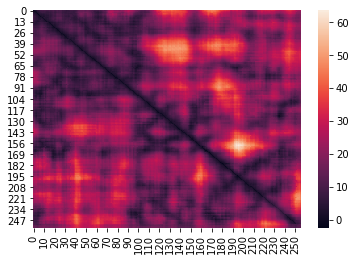

In [8]:
image_size=256
batch_size=1
print(f" 256 AA  ")
with torch.no_grad():
    fake_images_test = Gene256_G_100E(torch.randn(batch_size, 100, 1, 1, dtype=torch.float)).to("cpu")
    print(fake_images_test.shape)
    show_image(fake_images_test,index=0)
    print("BackBone: ",ckeckBackBone(fake_images_test,image_size=image_size,batch_size=batch_size).numpy())
    print("Short:    ",ckeckshort(fake_images_test,image_size=image_size,batch_size=batch_size).numpy())
    print("Long:     ",ckeckLong(fake_images_test,image_size=image_size,batch_size=batch_size).numpy())

##### save distance matrix of protein in text file 

In [9]:
np.savetxt(f"DistanceMatrixOfprotein{image_size}AA.txt", fake_images_test[0,0])

# Folding Protein
 Folding protein has been using ADMM to folding the distance matrix 
 we using the R code 

#### in R language programing
###### Save the matrix in text file

install.packages("RcppArmadillo", repos="https://rcppcore.github.io/drat")

install.packages("ADMM")

install.packages("bio3d")

library(ADMM)

library(bio3d) 

matR <- scan('DistanceMatrixOfprotein.txt')

matrix <- matrix(matR, ncol = 128, byrow = TRUE)

covXReal=stats::cov(matrix[1:128,1:128])#50

outReal=admm.spca(covXReal,3)

cinstantFactor=64

write.pdb( xyz = (outReal$basis*cinstantForDisance) , file="ADMM_FoldingProtein.pdb" )


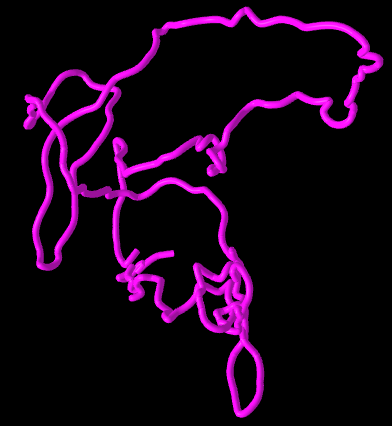